# Trainingsdaten vorbereiten
- Zur Erzeugung der Trainingsdaten wurde das entsprechende Skript ausgeführt
- Zur Vorbereitung der Trainingsdaten
    - werden die Lenkbefehle aus den Protokolldateien ausgelesen,
    - wird eine CSV mit Paaren von Dateinamen und Lenkbefehlen erstellt und
    - werden die Bilder verkleinert und in Graustufen umgewandelt.

In [75]:
# Ordner in dem die Trainingsdaten gespeichert sind
directory = "D:/Trainingsdaten"

## JSON-Dateien laden

In [76]:
test_executions = []

import json
for i in range(6):
    path = f"{directory}/training_data_{i}/generate-training-data-{i}_protocols.json"
    with open(path) as json_file:
        test_executions.append(json.load(json_file))

## Lenkbefehle und Kamerabilder extrahieren

In [117]:
# extract data
data = []
to_delete = []
for i, ex in enumerate(test_executions):
    for run in ex:
        snapshots = run["snapshots"]
        for snapshot in snapshots:
            snapshot_id = snapshot["_Snapshot__snapshot_id"]
            parameters = snapshot["lane_keeping_task_parameters"][0]
            image_filename = parameters["input"]["main_camera_image"]["filename"]
            command = parameters["output"]["vehicle_control_command"]
            if command:
                steer = command["steer"]
                data.append({"image_filename": f"training_data_{i}/img/{image_filename}", "steer": steer})
            else:
                to_delete.append(f"training_data_{i}/img/{image_filename}")
print(f"Anzahl der zu nutzenden Datenpaare: {len(data)}")
print(f"Anzahl der Datenpaare, die gelöscht werden sollen: {len(to_delete)}")

Anzahl der zu nutzenden Datenpaare: 197061
Anzahl der Datenpaare, die gelöscht werden sollen: 393


In [118]:
print(data[0])

{'image_filename': 'training_data_0/img/front-camera_000001.png', 'steer': -0.049841}


## Überflüssige Daten löschen
- überflüssige Bilder löschen, die keinen passenden Lenkbefehl erhalten haben (z. B. aufgrund der absichtlichen Verschiebung des Fahrzeugs)

In [102]:
print(to_delete[0])

training_data_0/img/front-camera_000000.png


In [39]:
import os
for file in to_delete:
    os.remove(f"{directory}/{file}")

In [122]:
print(data[0])

{'image_filename': 'img_0_000000.png', 'steer': -0.049841}


## Extrahierte Daten abspeichern
- erzeuge JSON und CSV-Datei

In [121]:
import json
with open(f'{directory}/data.json', 'w') as jsonfile:
        json.dump(data, jsonfile, indent=2)

In [120]:
import csv
with open(f'{directory}/data.csv', 'w', newline="") as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=["image_filename", "steer"], delimiter=";")
    writer.writeheader()
    writer.writerows(data)

## Bilder in Graustufen umwandeln und verkleinern

In [ ]:
import cv2
for dat in data[:1]:
    filename = dat["image_filename"]
    image = cv2.imread(f"{directory}/images/{filename}")
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    image = cv2.resize(image, (200, 100))
    cv2.imwrite(f'{directory}/grayscale_images/{filename}', image)
    print(filename, " converted and resized")

## Testen: Trainingsdaten laden

In [192]:
import csv
data = []
with open(f'{directory}/data.csv', 'r', newline="") as csvfile:
    reader = csv.DictReader(csvfile, delimiter=";")
    for row in reader:
        data.append(row)
print(len(data), " Datenpaare geladen")

197061  Datenpaare geladen


### 1 zufälliges Bild zeigen

image: img_3_131335.png
label: -0.099654
(100, 200)


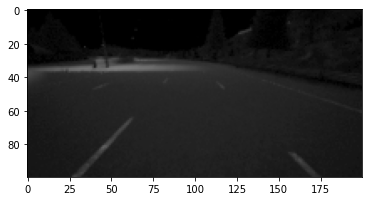

In [207]:
#subdirectory = "images"
subdirectory = "grayscale_images"

import matplotlib.pyplot as plt
import random

index = random.randint(0,190000)
image_filename = data[index]["image_filename"]
steer = data[index]["steer"]
print("image:", image_filename)
print("label:", float(steer))

import cv2
image = cv2.imread(f"{directory}/{subdirectory}/{image_filename}", cv2.IMREAD_UNCHANGED)
print(image.shape)
#image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
plt.imshow(image)
plt.show()